In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.io.fits as afits

In [3]:
import glob

In [4]:
fits = glob.glob('*.fits')

In [5]:
data=dict()
for fit in fits:
    print(fit[37])
    data.update({fit[37]:afits.open(fit)[0].data})

y
i
z
g
r


In [6]:
import skimage.exposure as skie

In [45]:
def proc_img(band):
    new_img = (data[band])
    imgn = new_img
    low = percentile(imgn, 0.2)
    high = percentile(imgn, 99.5)
    opt_img = skie.rescale_intensity(imgn,in_range=(low, high))
    return opt_img

(array([ 108507.,    8419.,    2159.,    1112.,     593.,     437.,
            280.,     166.,     120.,     707.]),
 array([ -1.00000000e+00,  -7.99999976e-01,  -5.99999952e-01,
         -3.99999928e-01,  -1.99999905e-01,   1.19209290e-07,
          2.00000143e-01,   4.00000167e-01,   6.00000191e-01,
          8.00000215e-01,   1.00000024e+00]),
 <a list of 10 Patch objects>)

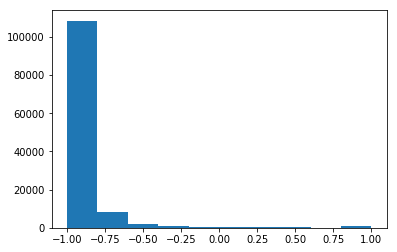

In [46]:
hist(proc_img('g').flatten())

In [47]:
# figure(figsize=(10,10))
# imshow(proc_img('g')-proc_img('i'),cmap='inferno')
# colorbar()

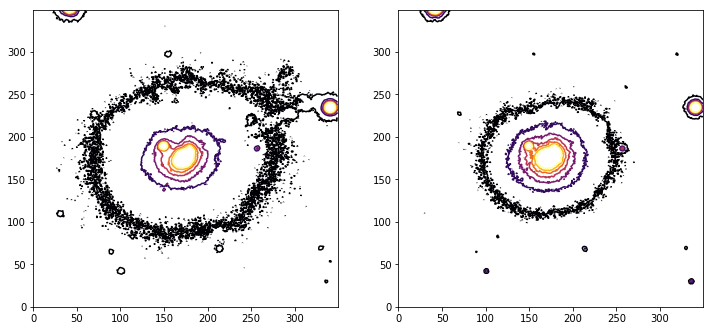

In [48]:
fig=figure(figsize=(12,12))
ax = fig.add_subplot(2,2,1)
ax.contour(proc_img('g'),cmap='inferno')
# ax.imshow(proc_img('i'))
ax2 = fig.add_subplot(2,2,2)
ax2.contour(proc_img('y'),cmap='inferno')

/Users/domi/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'c'
  s)


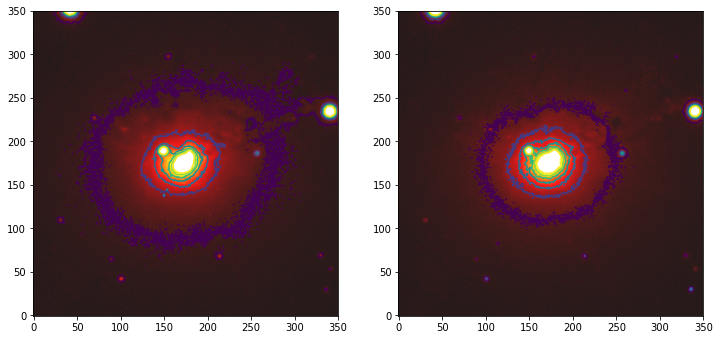

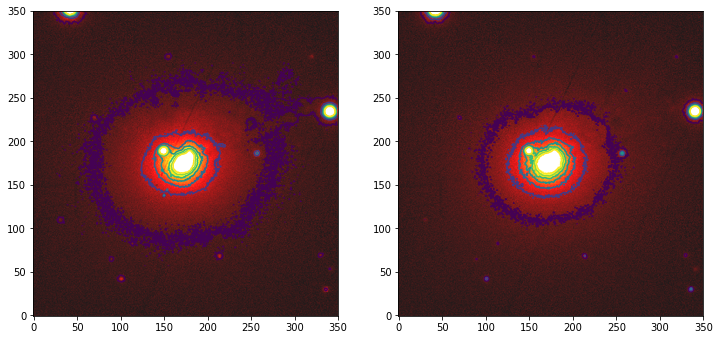

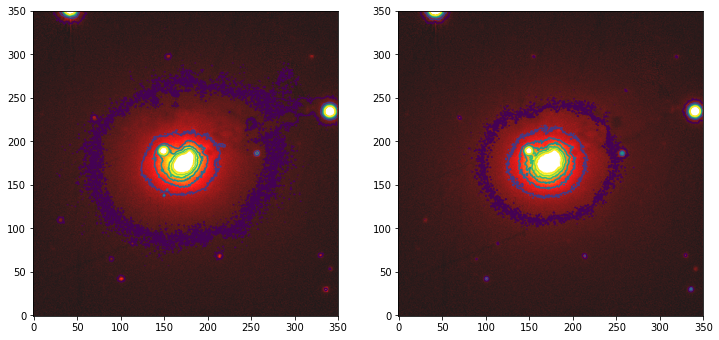

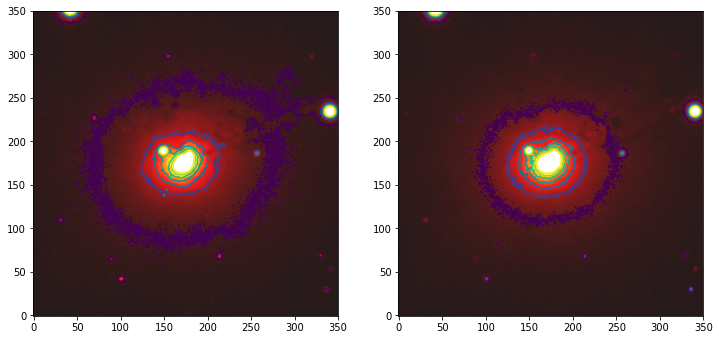

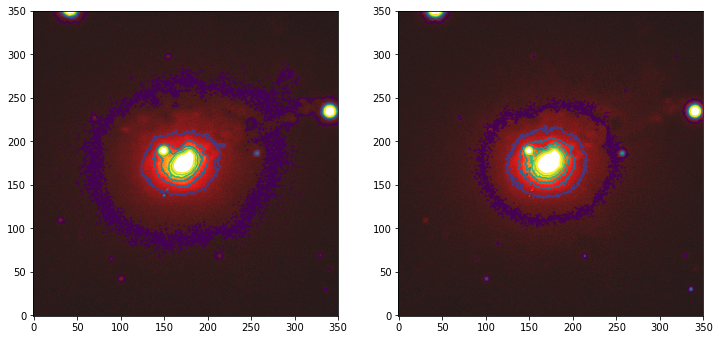

In [60]:
for band in data.keys():
    alpha = 0.9
    cmap = 'hot'
    fig=figure(figsize=(12,12))
    ax = fig.add_subplot(1,2,1)
    ax.contour(proc_img('g'),c='b')
    ax.imshow(proc_img(band),alpha=alpha,cmap=cmap,origin='lower')
    ax2 = fig.add_subplot(1,2,2)
    ax2.contour(proc_img('y'),c='r')
    ax2.imshow(proc_img(band),alpha=alpha,cmap=cmap,origin='lower')
    savefig(band)